In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd

from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
# y = df["species"]
X = df.drop('species', axis='columns')
y = df.species
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, 
                                                     random_state=1, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(125, 4)
(125,)
(25, 4)
(25,)


In [6]:
for d in range(2,10) :
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
#     print(scores)
    print("d: ", d, "accuracy", scores.mean())


d:  2 accuracy 0.944
d:  3 accuracy 0.944
d:  4 accuracy 0.944
d:  5 accuracy 0.9359999999999999
d:  6 accuracy 0.9359999999999999
d:  7 accuracy 0.944
d:  8 accuracy 0.9359999999999999
d:  9 accuracy 0.944


In [7]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [8]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.976
Test Accuracy: 0.96


In [9]:
# cm = confusion_matrix(y_test, y_hat)
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat, labels=['setosa', 'versicolor', 'virginica'])
print(cm)

[[8 0 0]
 [0 9 0]
 [0 1 7]]


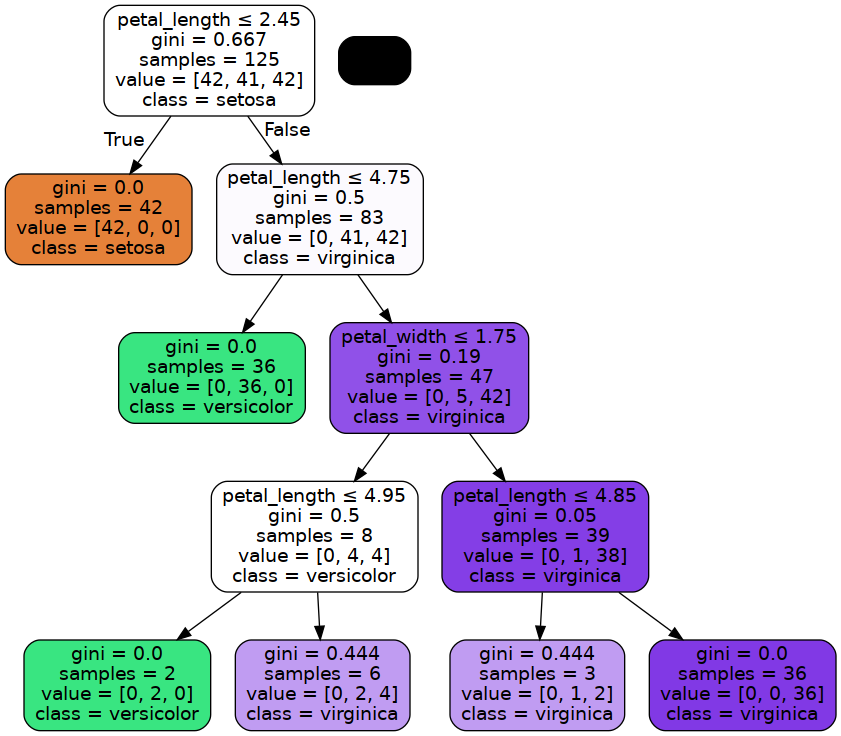

In [10]:
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/iris.png')
Image(graph.create_png())